In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [49]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

### Data Splitting

In [50]:
X = data_without_0.drop('Y',axis=1)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y']


#### Replacing null values with columns mean

In [51]:
X.fillna(X.mean(),inplace=True)

### Feature Scaling

In [52]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,X1,X2,X3,Z1,Z2,A,B
0,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381
1,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937
2,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381
3,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174
4,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456


## Clustering

In [53]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
X['cluster_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
X['cluster_all_features'].value_counts()

cluster_all_features
1    21
0     9
Name: count, dtype: int64

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

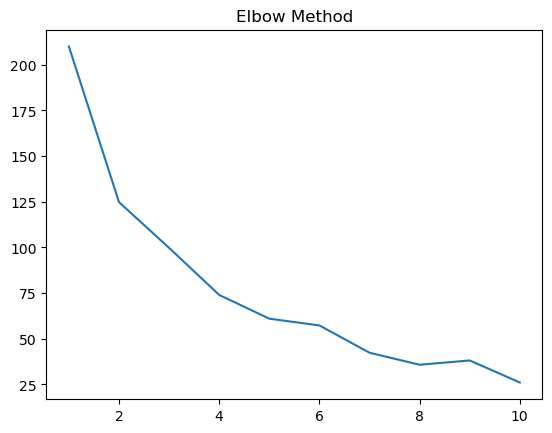

In [55]:
### Elbow Method

# elbow method to determine the number of clusters
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.show()


In [56]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
X['4_clusters_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
X['4_clusters_all_features'].value_counts()

4_clusters_all_features
2    13
0    10
1     6
3     1
Name: count, dtype: int64

In [82]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled[['X1','X2']])
X['4_clusters_all_X1X2'] = kmeans.predict(X_scaled[['X1','X2']])

X['4_clusters_all_X1X2'] .value_counts()


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4_clusters_all_X1X2
1    11
2    10
3     6
0     3
Name: count, dtype: int64

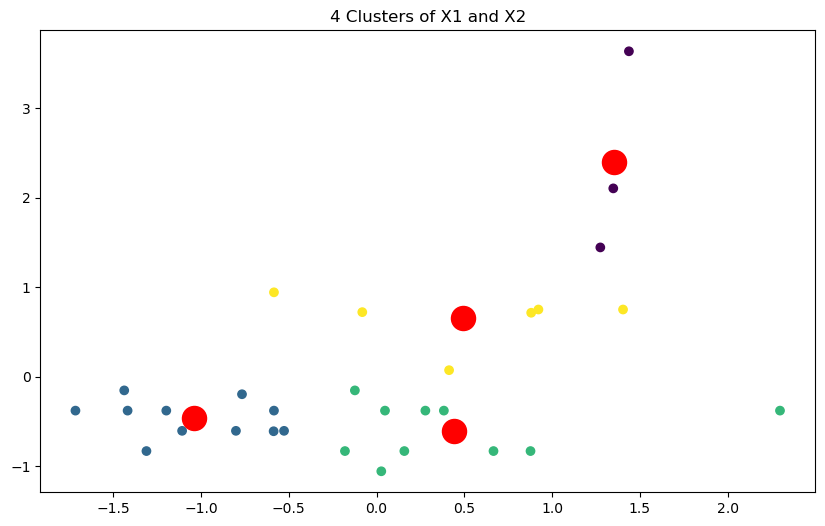

In [83]:
# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X['4_clusters_all_X1X2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of X1 and X2')
plt.show()